# Лабораторная работа №5.
## Catboost. Градиентный бустинг

В достаточной степени подробно о градиентном бустинге описано в статье:
* https://habr.com/ru/company/ods/blog/327250/

Документация Catboost доступна по ссылке:
* https://tech.yandex.ru/catboost/

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head() # четыре признака: sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
species = pd.unique(iris.species) # классы, которые нужно предсказать

### Задание 1
Преобразуйте метки классов колонки species в численный вид. Просмотрите датасет, постройте графики (гистограммы, зависимости) и очистите его от дубликатов и пустых строк, если таковые имеются.

D:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


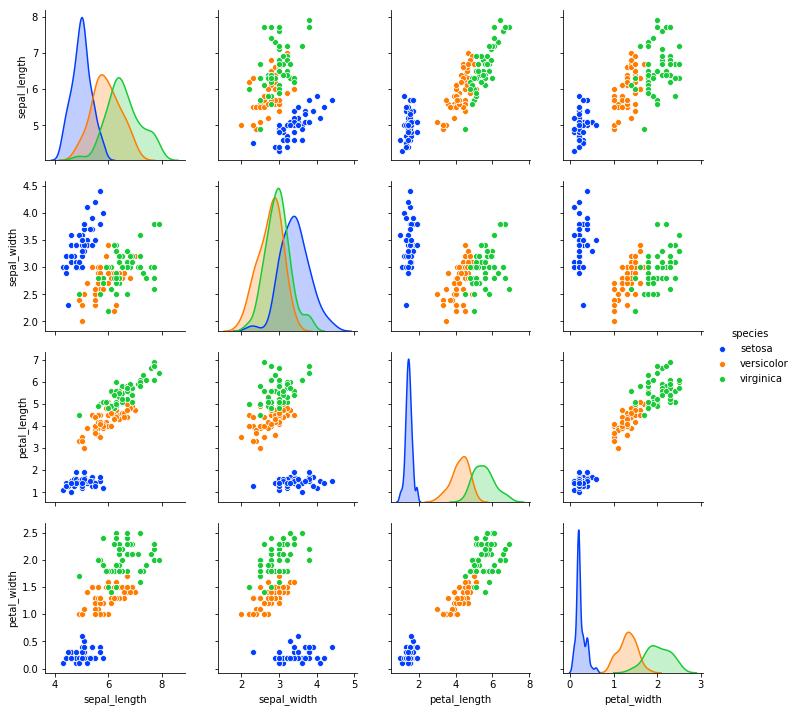

In [6]:
# Ваш код
iris.dropna()
iris_num = pd.get_dummies(iris).drop_duplicates()

sns.pairplot(iris, hue="species",palette="bright")
plt.show()

### Задание 2
Получите новые бинарные признаки, например: постройте график зависимости iris.sepal_length от iris.sepal_width и окрасьте точки в зависимости от iris.species. Мы видим, что один класс можно легко выделить, если взять iris.sepal_length < 6 и iris.sepal_width > 3. Создайте 5 бинарных признаков.

In [7]:
iris_num.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


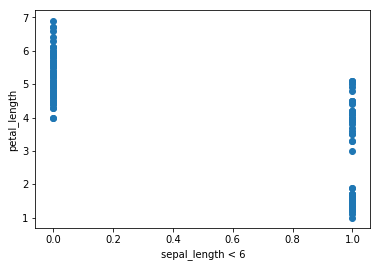

In [8]:
feature_x = np.zeros(iris_num.shape[0])
feature_x[np.where(iris_num.sepal_length < 6)] = 1
feature_y = iris_num.petal_length

plt.xlabel('sepal_length < 6')
plt.ylabel('petal_length')
plt.scatter(feature_x, feature_y)
plt.show()

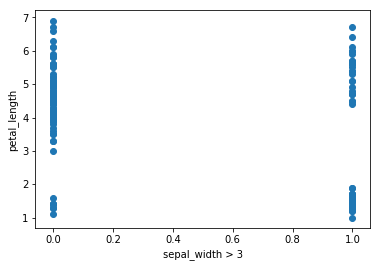

In [9]:
feature_x = np.zeros(iris_num.shape[0])
feature_x[np.where(iris_num.sepal_width > 3)] = 1
feature_y = iris_num.petal_length

plt.xlabel('sepal_width > 3')
plt.ylabel('petal_length')
plt.scatter(feature_x, feature_y)
plt.show()

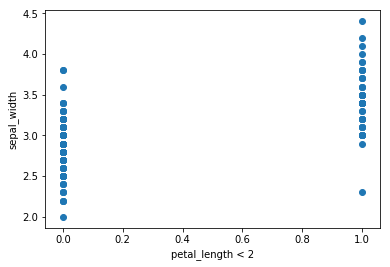

In [10]:
feature_x = np.zeros(iris_num.shape[0])
feature_x[np.where(iris_num.petal_length < 2)] = 1
feature_y = iris_num.sepal_width

plt.xlabel('petal_length < 2')
plt.ylabel('sepal_width')
plt.scatter(feature_x, feature_y)
plt.show()

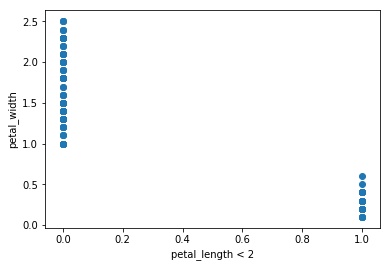

In [11]:
feature_x = np.zeros(iris_num.shape[0])
feature_x[np.where(iris_num.petal_length < 2)] = 1
feature_y = iris_num.petal_width

plt.xlabel('petal_length < 2')
plt.ylabel('petal_width')
plt.scatter(feature_x, feature_y)
plt.show()

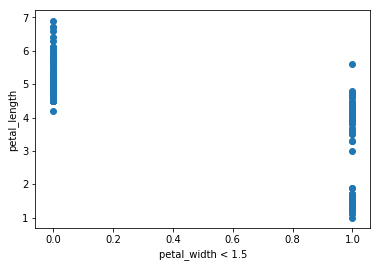

In [12]:
feature_x = np.zeros(iris_num.shape[0])
feature_x[np.where(iris_num.petal_width < 1.5)] = 1
feature_y = iris_num.petal_length

plt.xlabel('petal_width < 1.5')
plt.ylabel('petal_length')
plt.scatter(feature_x, feature_y)
plt.show()

### Задание 3
По ссылке https://catboost.ai/docs/concepts/python-usages-examples.html изучите возможности применения catboost.
* Создайте модель Catboost.Classifier
* Перемешайте данные
* Отберите 10 % данных для валидации
* Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков 
* Выберите функцию ошибки для данной задачи, объясните свой выбор
* Обучите модель и оцените ошибку на валидационных данных, объясните результат

In [21]:
# Ваш код
from catboost import CatBoostClassifier
model = CatBoostClassifier(loss_function='MultiClass')

In [22]:
from sklearn.model_selection import train_test_split
iris_x= iris_num[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y = iris_num[['species_setosa', 'species_versicolor', 'species_virginica']]

iris_train_x, iris_val_x,iris_train_y, iris_val_y = train_test_split(iris_x, iris_y, shuffle=True, test_size=0.1)

In [23]:
from catboost import Pool

train_pool = Pool(iris_train_x, iris_train_y)
validate_pool = Pool(iris_val_x, iris_val_y)

models = []
for i in range(5):
    model = CatBoostClassifier(iterations=100, random_seed=i)
    model.fit(train_pool, eval_set=validate_pool)

Learning rate set to 0.169277
0:	learn: 0.3994302	test: 0.4186262	best: 0.4186262 (0)	total: 34.2ms	remaining: 3.39s
1:	learn: 0.2461915	test: 0.2804281	best: 0.2804281 (1)	total: 58.9ms	remaining: 2.89s
2:	learn: 0.1645538	test: 0.1893577	best: 0.1893577 (2)	total: 83.7ms	remaining: 2.71s
3:	learn: 0.1087961	test: 0.1287176	best: 0.1287176 (3)	total: 109ms	remaining: 2.61s
4:	learn: 0.0737635	test: 0.0881959	best: 0.0881959 (4)	total: 126ms	remaining: 2.39s
5:	learn: 0.0543426	test: 0.0727300	best: 0.0727300 (5)	total: 149ms	remaining: 2.34s
6:	learn: 0.0412765	test: 0.0576522	best: 0.0576522 (6)	total: 173ms	remaining: 2.3s
7:	learn: 0.0330102	test: 0.0469467	best: 0.0469467 (7)	total: 199ms	remaining: 2.29s
8:	learn: 0.0259847	test: 0.0378616	best: 0.0378616 (8)	total: 224ms	remaining: 2.27s
9:	learn: 0.0198675	test: 0.0294493	best: 0.0294493 (9)	total: 242ms	remaining: 2.18s
10:	learn: 0.0153278	test: 0.0227169	best: 0.0227169 (10)	total: 260ms	remaining: 2.1s
11:	learn: 0.0133053	

97:	learn: 0.0007071	test: 0.0012208	best: 0.0012208 (97)	total: 2.32s	remaining: 47.4ms
98:	learn: 0.0007013	test: 0.0012126	best: 0.0012126 (98)	total: 2.35s	remaining: 23.7ms
99:	learn: 0.0006942	test: 0.0012048	best: 0.0012048 (99)	total: 2.37s	remaining: 0us

bestTest = 0.00120477153
bestIteration = 99

Learning rate set to 0.169277
0:	learn: 0.4062949	test: 0.4278723	best: 0.4278723 (0)	total: 25.8ms	remaining: 2.56s
1:	learn: 0.2259095	test: 0.2404868	best: 0.2404868 (1)	total: 49.1ms	remaining: 2.41s
2:	learn: 0.1515532	test: 0.1572679	best: 0.1572679 (2)	total: 63.3ms	remaining: 2.04s
3:	learn: 0.0911963	test: 0.0991385	best: 0.0991385 (3)	total: 78.6ms	remaining: 1.89s
4:	learn: 0.0744399	test: 0.0781791	best: 0.0781791 (4)	total: 102ms	remaining: 1.94s
5:	learn: 0.0611319	test: 0.0636816	best: 0.0636816 (5)	total: 132ms	remaining: 2.07s
6:	learn: 0.0448560	test: 0.0504357	best: 0.0504357 (6)	total: 158ms	remaining: 2.1s
7:	learn: 0.0374818	test: 0.0441014	best: 0.0441014 (7)

93:	learn: 0.0007443	test: 0.0012665	best: 0.0012665 (93)	total: 2.26s	remaining: 144ms
94:	learn: 0.0007371	test: 0.0012539	best: 0.0012539 (94)	total: 2.28s	remaining: 120ms
95:	learn: 0.0007271	test: 0.0012442	best: 0.0012442 (95)	total: 2.31s	remaining: 96.1ms
96:	learn: 0.0007153	test: 0.0012278	best: 0.0012278 (96)	total: 2.33s	remaining: 71.9ms
97:	learn: 0.0007030	test: 0.0012149	best: 0.0012149 (97)	total: 2.34s	remaining: 47.8ms
98:	learn: 0.0006974	test: 0.0012049	best: 0.0012049 (98)	total: 2.36s	remaining: 23.9ms
99:	learn: 0.0006890	test: 0.0011963	best: 0.0011963 (99)	total: 2.39s	remaining: 0us

bestTest = 0.001196334138
bestIteration = 99

Learning rate set to 0.169277
0:	learn: 0.3961001	test: 0.4101606	best: 0.4101606 (0)	total: 24ms	remaining: 2.37s
1:	learn: 0.2652323	test: 0.2847249	best: 0.2847249 (1)	total: 51.2ms	remaining: 2.51s
2:	learn: 0.1695095	test: 0.1918211	best: 0.1918211 (2)	total: 75ms	remaining: 2.42s
3:	learn: 0.1178322	test: 0.1492983	best: 0.1492

88:	learn: 0.0008434	test: 0.0016006	best: 0.0016006 (88)	total: 2.01s	remaining: 248ms
89:	learn: 0.0008391	test: 0.0015928	best: 0.0015928 (89)	total: 2.04s	remaining: 226ms
90:	learn: 0.0008296	test: 0.0015720	best: 0.0015720 (90)	total: 2.06s	remaining: 204ms
91:	learn: 0.0008205	test: 0.0015539	best: 0.0015539 (91)	total: 2.09s	remaining: 182ms
92:	learn: 0.0008142	test: 0.0015502	best: 0.0015502 (92)	total: 2.11s	remaining: 159ms
93:	learn: 0.0008039	test: 0.0015338	best: 0.0015338 (93)	total: 2.14s	remaining: 137ms
94:	learn: 0.0007961	test: 0.0015178	best: 0.0015178 (94)	total: 2.16s	remaining: 114ms
95:	learn: 0.0007847	test: 0.0014992	best: 0.0014992 (95)	total: 2.19s	remaining: 91.3ms
96:	learn: 0.0007710	test: 0.0014797	best: 0.0014797 (96)	total: 2.2s	remaining: 68.2ms
97:	learn: 0.0007604	test: 0.0014619	best: 0.0014619 (97)	total: 2.23s	remaining: 45.5ms
98:	learn: 0.0007531	test: 0.0014521	best: 0.0014521 (98)	total: 2.25s	remaining: 22.7ms
99:	learn: 0.0007504	test: 0.

86:	learn: 0.0008892	test: 0.0013602	best: 0.0013602 (86)	total: 1.98s	remaining: 296ms
87:	learn: 0.0008801	test: 0.0013444	best: 0.0013444 (87)	total: 2s	remaining: 273ms
88:	learn: 0.0008626	test: 0.0013172	best: 0.0013172 (88)	total: 2.02s	remaining: 250ms
89:	learn: 0.0008495	test: 0.0012989	best: 0.0012989 (89)	total: 2.05s	remaining: 228ms
90:	learn: 0.0008421	test: 0.0012922	best: 0.0012922 (90)	total: 2.07s	remaining: 205ms
91:	learn: 0.0008337	test: 0.0012821	best: 0.0012821 (91)	total: 2.1s	remaining: 182ms
92:	learn: 0.0008270	test: 0.0012766	best: 0.0012766 (92)	total: 2.12s	remaining: 160ms
93:	learn: 0.0008259	test: 0.0012747	best: 0.0012747 (93)	total: 2.14s	remaining: 137ms
94:	learn: 0.0008179	test: 0.0012649	best: 0.0012649 (94)	total: 2.17s	remaining: 114ms
95:	learn: 0.0008087	test: 0.0012515	best: 0.0012515 (95)	total: 2.19s	remaining: 91.3ms
96:	learn: 0.0007951	test: 0.0012322	best: 0.0012322 (96)	total: 2.21s	remaining: 68.5ms
97:	learn: 0.0007922	test: 0.00123

79:	learn: 0.0009793	test: 0.0012016	best: 0.0012016 (79)	total: 1.81s	remaining: 454ms
80:	learn: 0.0009667	test: 0.0011777	best: 0.0011777 (80)	total: 1.84s	remaining: 431ms
81:	learn: 0.0009556	test: 0.0011679	best: 0.0011679 (81)	total: 1.86s	remaining: 409ms
82:	learn: 0.0009440	test: 0.0011566	best: 0.0011566 (82)	total: 1.89s	remaining: 387ms
83:	learn: 0.0009301	test: 0.0011414	best: 0.0011414 (83)	total: 1.91s	remaining: 365ms
84:	learn: 0.0009219	test: 0.0011264	best: 0.0011264 (84)	total: 1.93s	remaining: 341ms
85:	learn: 0.0009075	test: 0.0011113	best: 0.0011113 (85)	total: 1.96s	remaining: 318ms
86:	learn: 0.0009054	test: 0.0011056	best: 0.0011056 (86)	total: 1.98s	remaining: 296ms
87:	learn: 0.0008985	test: 0.0010984	best: 0.0010984 (87)	total: 2s	remaining: 273ms
88:	learn: 0.0008937	test: 0.0010913	best: 0.0010913 (88)	total: 2.03s	remaining: 251ms
89:	learn: 0.0008820	test: 0.0010790	best: 0.0010790 (89)	total: 2.05s	remaining: 228ms
90:	learn: 0.0008727	test: 0.001072

In [24]:
cls = CatBoostClassifier(loss_function='MultiClass')

cls.fit(validate_pool)

0:	learn: -0.6826066	total: 16ms	remaining: 16s
1:	learn: -0.6715521	total: 26.8ms	remaining: 13.4s
2:	learn: -0.6580148	total: 35.1ms	remaining: 11.7s
3:	learn: -0.6461920	total: 42.8ms	remaining: 10.7s
4:	learn: -0.6341921	total: 50.8ms	remaining: 10.1s
5:	learn: -0.6234281	total: 63.4ms	remaining: 10.5s
6:	learn: -0.6126405	total: 74.4ms	remaining: 10.6s
7:	learn: -0.6025715	total: 85.9ms	remaining: 10.7s
8:	learn: -0.5939780	total: 99.1ms	remaining: 10.9s
9:	learn: -0.5859702	total: 111ms	remaining: 11s
10:	learn: -0.5744378	total: 120ms	remaining: 10.8s
11:	learn: -0.5655034	total: 135ms	remaining: 11.1s
12:	learn: -0.5555455	total: 143ms	remaining: 10.8s
13:	learn: -0.5474864	total: 156ms	remaining: 11s
14:	learn: -0.5379892	total: 164ms	remaining: 10.8s
15:	learn: -0.5318832	total: 181ms	remaining: 11.1s
16:	learn: -0.5273030	total: 196ms	remaining: 11.4s
17:	learn: -0.5209358	total: 212ms	remaining: 11.6s
18:	learn: -0.5142107	total: 226ms	remaining: 11.7s
19:	learn: -0.5095929

168:	learn: -0.1132464	total: 2.06s	remaining: 10.1s
169:	learn: -0.1122596	total: 2.07s	remaining: 10.1s
170:	learn: -0.1110992	total: 2.08s	remaining: 10.1s
171:	learn: -0.1103542	total: 2.09s	remaining: 10.1s
172:	learn: -0.1093368	total: 2.1s	remaining: 10s
173:	learn: -0.1083731	total: 2.1s	remaining: 9.99s
174:	learn: -0.1072774	total: 2.11s	remaining: 9.95s
175:	learn: -0.1065584	total: 2.12s	remaining: 9.93s
176:	learn: -0.1054923	total: 2.13s	remaining: 9.88s
177:	learn: -0.1044437	total: 2.13s	remaining: 9.85s
178:	learn: -0.1038127	total: 2.15s	remaining: 9.85s
179:	learn: -0.1028911	total: 2.16s	remaining: 9.82s
180:	learn: -0.1021825	total: 2.16s	remaining: 9.79s
181:	learn: -0.1015422	total: 2.17s	remaining: 9.77s
182:	learn: -0.1006581	total: 2.18s	remaining: 9.75s
183:	learn: -0.1000510	total: 2.19s	remaining: 9.73s
184:	learn: -0.0990898	total: 2.2s	remaining: 9.7s
185:	learn: -0.0981439	total: 2.21s	remaining: 9.66s
186:	learn: -0.0972130	total: 2.21s	remaining: 9.62s

324:	learn: -0.0416003	total: 3.24s	remaining: 6.73s
325:	learn: -0.0413904	total: 3.25s	remaining: 6.71s
326:	learn: -0.0411825	total: 3.25s	remaining: 6.69s
327:	learn: -0.0409764	total: 3.26s	remaining: 6.67s
328:	learn: -0.0407722	total: 3.26s	remaining: 6.66s
329:	learn: -0.0405699	total: 3.27s	remaining: 6.64s
330:	learn: -0.0403694	total: 3.28s	remaining: 6.62s
331:	learn: -0.0401707	total: 3.28s	remaining: 6.61s
332:	learn: -0.0399737	total: 3.29s	remaining: 6.59s
333:	learn: -0.0397786	total: 3.3s	remaining: 6.57s
334:	learn: -0.0395851	total: 3.3s	remaining: 6.56s
335:	learn: -0.0393934	total: 3.31s	remaining: 6.54s
336:	learn: -0.0392034	total: 3.31s	remaining: 6.52s
337:	learn: -0.0390619	total: 3.32s	remaining: 6.51s
338:	learn: -0.0389851	total: 3.33s	remaining: 6.49s
339:	learn: -0.0387987	total: 3.34s	remaining: 6.48s
340:	learn: -0.0386641	total: 3.35s	remaining: 6.46s
341:	learn: -0.0385186	total: 3.35s	remaining: 6.45s
342:	learn: -0.0383742	total: 3.36s	remaining: 6

483:	learn: -0.0238422	total: 4.42s	remaining: 4.71s
484:	learn: -0.0237754	total: 4.42s	remaining: 4.7s
485:	learn: -0.0237008	total: 4.43s	remaining: 4.69s
486:	learn: -0.0236348	total: 4.44s	remaining: 4.68s
487:	learn: -0.0235817	total: 4.45s	remaining: 4.67s
488:	learn: -0.0235284	total: 4.46s	remaining: 4.66s
489:	learn: -0.0234552	total: 4.46s	remaining: 4.64s
490:	learn: -0.0234132	total: 4.48s	remaining: 4.64s
491:	learn: -0.0233407	total: 4.49s	remaining: 4.63s
492:	learn: -0.0232981	total: 4.49s	remaining: 4.62s
493:	learn: -0.0232262	total: 4.5s	remaining: 4.61s
494:	learn: -0.0231548	total: 4.5s	remaining: 4.6s
495:	learn: -0.0230837	total: 4.51s	remaining: 4.58s
496:	learn: -0.0230131	total: 4.52s	remaining: 4.57s
497:	learn: -0.0229429	total: 4.52s	remaining: 4.56s
498:	learn: -0.0228879	total: 4.53s	remaining: 4.55s
499:	learn: -0.0228184	total: 4.54s	remaining: 4.54s
500:	learn: -0.0227570	total: 4.55s	remaining: 4.53s
501:	learn: -0.0227142	total: 4.56s	remaining: 4.5

641:	learn: -0.0167428	total: 5.67s	remaining: 3.16s
642:	learn: -0.0167044	total: 5.67s	remaining: 3.15s
643:	learn: -0.0166661	total: 5.68s	remaining: 3.14s
644:	learn: -0.0166280	total: 5.68s	remaining: 3.13s
645:	learn: -0.0166058	total: 5.69s	remaining: 3.12s
646:	learn: -0.0165812	total: 5.7s	remaining: 3.11s
647:	learn: -0.0165478	total: 5.71s	remaining: 3.1s
648:	learn: -0.0165218	total: 5.72s	remaining: 3.09s
649:	learn: -0.0164844	total: 5.73s	remaining: 3.08s
650:	learn: -0.0164471	total: 5.73s	remaining: 3.07s
651:	learn: -0.0164100	total: 5.74s	remaining: 3.06s
652:	learn: -0.0163772	total: 5.75s	remaining: 3.05s
653:	learn: -0.0163589	total: 5.75s	remaining: 3.04s
654:	learn: -0.0163425	total: 5.77s	remaining: 3.04s
655:	learn: -0.0163058	total: 5.78s	remaining: 3.03s
656:	learn: -0.0162845	total: 5.78s	remaining: 3.02s
657:	learn: -0.0162633	total: 5.79s	remaining: 3.01s
658:	learn: -0.0162347	total: 5.8s	remaining: 3s
659:	learn: -0.0162158	total: 5.81s	remaining: 2.99s

809:	learn: -0.0126316	total: 6.96s	remaining: 1.63s
810:	learn: -0.0126092	total: 6.97s	remaining: 1.62s
811:	learn: -0.0125870	total: 6.97s	remaining: 1.61s
812:	learn: -0.0125696	total: 6.98s	remaining: 1.61s
813:	learn: -0.0125589	total: 6.99s	remaining: 1.6s
814:	learn: -0.0125368	total: 7s	remaining: 1.59s
815:	learn: -0.0125147	total: 7s	remaining: 1.58s
816:	learn: -0.0124928	total: 7.01s	remaining: 1.57s
817:	learn: -0.0124803	total: 7.03s	remaining: 1.56s
818:	learn: -0.0124585	total: 7.03s	remaining: 1.55s
819:	learn: -0.0124368	total: 7.04s	remaining: 1.54s
820:	learn: -0.0124151	total: 7.04s	remaining: 1.53s
821:	learn: -0.0124001	total: 7.05s	remaining: 1.53s
822:	learn: -0.0123786	total: 7.06s	remaining: 1.52s
823:	learn: -0.0123596	total: 7.07s	remaining: 1.51s
824:	learn: -0.0123381	total: 7.07s	remaining: 1.5s
825:	learn: -0.0123168	total: 7.08s	remaining: 1.49s
826:	learn: -0.0122955	total: 7.08s	remaining: 1.48s
827:	learn: -0.0122743	total: 7.09s	remaining: 1.47s
8

969:	learn: -0.0102067	total: 8.23s	remaining: 255ms
970:	learn: -0.0101919	total: 8.24s	remaining: 246ms
971:	learn: -0.0101772	total: 8.24s	remaining: 238ms
972:	learn: -0.0101657	total: 8.25s	remaining: 229ms
973:	learn: -0.0101510	total: 8.26s	remaining: 221ms
974:	learn: -0.0101381	total: 8.27s	remaining: 212ms
975:	learn: -0.0101235	total: 8.27s	remaining: 203ms
976:	learn: -0.0101176	total: 8.29s	remaining: 195ms
977:	learn: -0.0101031	total: 8.29s	remaining: 187ms
978:	learn: -0.0100886	total: 8.3s	remaining: 178ms
979:	learn: -0.0100741	total: 8.3s	remaining: 169ms
980:	learn: -0.0100597	total: 8.31s	remaining: 161ms
981:	learn: -0.0100454	total: 8.32s	remaining: 152ms
982:	learn: -0.0100310	total: 8.32s	remaining: 144ms
983:	learn: -0.0100167	total: 8.33s	remaining: 135ms
984:	learn: -0.0100025	total: 8.33s	remaining: 127ms
985:	learn: -0.0099882	total: 8.34s	remaining: 118ms
986:	learn: -0.0099771	total: 8.35s	remaining: 110ms
987:	learn: -0.0099629	total: 8.35s	remaining: 1